In [1]:
%matplotlib inline
import pandas
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import math
from geopy.distance import vincenty

In [2]:
data = pandas.read_csv(r"tramwaje.csv",
					   dtype = {'Status': str, 'FirstLine': int,  'Lines': str,
								'Lon': float, 'Lat': float, 'Time': datetime.datetime, 'LowFloor': bool, 'Brigade': str},
                      parse_dates = ['Time'])

In [3]:
data.head(15)

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
0,RUNNING,25,21.034733,25,2017-05-21 15:38:04,52.258099,True,5
1,RUNNING,20,20.897888,20,2017-05-21 15:38:00,52.260101,True,6
2,RUNNING,4,21.022173,4,2017-05-21 15:38:27,52.207378,True,2
3,RUNNING,17,20.997881,"17,18",2017-05-21 15:38:00,52.254669,True,5
4,RUNNING,25,20.993887,25,2017-05-21 15:38:08,52.226051,True,1
5,RUNNING,28,21.028883,28,2017-05-21 15:38:30,52.256512,True,6
6,RUNNING,9,20.946791,9,2017-05-21 15:38:30,52.178928,True,38
7,RUNNING,22,20.962631,22,2017-05-21 15:38:30,52.266991,True,7
8,RUNNING,9,21.039267,9,2017-05-21 15:38:10,52.235615,True,32
9,RUNNING,15,20.980597,15,2017-05-21 15:38:27,52.275333,True,4


In [4]:
data.tail(15)

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
3086653,RUNNING,3,21.044020,3,2017-05-27 13:43:32,52.248993,True,4
3086654,RUNNING,26,20.916243,26,2017-05-27 13:43:33,52.225891,True,5
3086655,RUNNING,3,21.118853,3,2017-05-27 13:43:04,52.238129,True,2
3086656,RUNNING,3,21.024530,3,2017-05-27 13:43:31,52.296951,True,7
3086657,RUNNING,3,21.038547,3,2017-05-27 13:43:09,52.264545,True,8
3086658,RUNNING,9,21.012318,9,2017-05-27 13:43:31,52.229969,True,32
3086659,RUNNING,9,20.943748,9,2017-05-27 13:43:29,52.175838,True,8
3086660,RUNNING,7,20.943928,7,2017-05-27 13:43:04,52.175953,True,7
3086661,RUNNING,22,20.981201,22,2017-05-27 13:43:22,52.252972,True,9
3086662,RUNNING,22,20.945314,22,2017-05-27 13:43:33,52.271637,True,8


### Status

In [5]:
len(data[data['Status'] != 'RUNNING'])

0

Kolumna Status przyjmuje tylko jedną wartość, więc można się jej pozbyć.

In [6]:
data = data.drop('Status', 1)

### FirstLine

In [7]:
data.groupby('FirstLine', sort=True).size()

FirstLine
1     162787
2      84091
3     106001
4     126472
6     125666
7     109804
9     273449
10    138745
11    109677
13     83462
14     69135
15    127592
17    138964
18     67736
20    108955
22    133579
23    103876
24    149381
25    113673
26    144376
27     62003
28    111483
31     62368
33    181230
35    147967
44     44196
dtype: int64

* Po porównaniu zebranych danych z rozkładem jazdy okazało się, że istnieją dane dla wszystkich funkcjonujących obecnie tramwajów poza linią 77 (linia uzupełniająca).

* Najmniej obserwacji znaleziono dla linii 44 - jest to linia okresowa, co oznacza, że kursuje tylko w dni nauki szkolnej i tylko w określonych porach (5-9 i 14-18).

* Najwięcej obserwacji znaleziono dla linii 9 - jeździ ona bardzo często (w godzinach 8-19 nawet co kilka minut) i kursuje prawie przez całą dobę (zaczyna o 4.10, a kończy o 1.20)

### Lat i Lon

#### Usunięcie danych spoza Warszawy

In [8]:
minLat = 52.09
maxLat = 52.36
minLon = 20.85
maxLon = 21.27

In [9]:
oldLen = len(data)

In [10]:
data = data[(data['Lat'] < maxLat) & (minLat < data['Lat']) & (data['Lon'] < maxLon) & (minLon < data['Lon'])]

In [11]:
len(data) / oldLen

0.9989357456001099

Istnieją dane, dla których współrzędne geograficzne były nieprawidłowe (poza granicami Warszawy), jednak było to zaledwie 0.1% danych.

#### Obliczenie prędkości

In [12]:
n = len(data)
maxDist = 0.05
data = data.drop_duplicates(subset=['FirstLine', 'Brigade', 'Time']).sort_values('Time')
data['TimeDiff'] = data.groupby(['FirstLine', 'Brigade'])['Time'].diff()
data['PrevLon'] = data.groupby(['FirstLine', 'Brigade'])['Lon'].shift()
data['PrevLat'] = data.groupby(['FirstLine', 'Brigade'])['Lat'].shift()

In [13]:
def dist(x1, y1, x2, y2):
    if any(pandas.isnull([x1, y1, x2, y2])):
        return 0
    obj1 = (x1, y1)
    obj2 = (x2, y2)
    return vincenty(obj1, obj2).meters
data['Velocity'] = data.apply(lambda x: 
                            dist(x['Lon'], x['Lat'], x['PrevLon'], x['PrevLat']) / (x['TimeDiff'].seconds if pandas.notnull(x['TimeDiff'] and x['TimeDiff']) else 1),
                            axis=1)
data = data.dropna(how='all')

In [14]:
data.head(15).apply(lambda x: print(x['Lon']), axis=1)

21.032127399999997
20.9726086
20.917579699999997
20.978851300000002
21.002243
20.977897600000002
21.0159645
21.0245342
21.0170841
21.033351899999996
20.9745064
21.018997199999998
20.96175
21.000625600000003
20.979126


168    None
157    None
161    None
170    None
49     None
173    None
62     None
34     None
166    None
42     None
89     None
91     None
94     None
17     None
36     None
dtype: object

### Time

In [15]:
data['Day'] = data['Time'].map(lambda x: x.day)

In [16]:
data.groupby('Day').size()

Day
21    114619
22    342762
23    461439
24    497826
25    457770
26    478430
27    155214
dtype: int64

Pełne dane są dostępne tylko z okresu 23-26 marca.

In [17]:
startTime = datetime.datetime(year=2017, month=5, day=24, hour=2)
endTime = datetime.datetime(year=2017, month=5, day=25, hour=3)
dataOneDay = data[(data['Time'] > startTime) & (data['Time'] < endTime)]

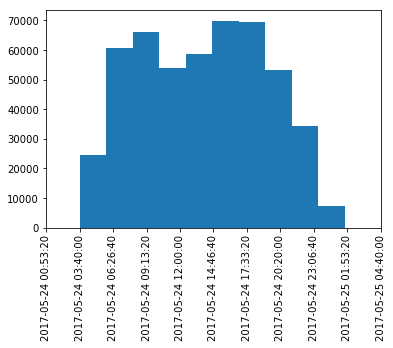

In [18]:
plt.hist([t.timestamp() for t in dataOneDay['Time']])
locs, labels = plt.xticks()
plt.xticks(locs,[datetime.datetime.fromtimestamp(t) for t in locs], rotation='vertical')
plt.show()

### Brigade

In [19]:
data.groupby('Brigade').size()

Brigade
01        1998
010      20742
011      24746
012      29091
013      40745
014      44790
015      55302
016      38366
017      26913
018      22056
019      14975
02        3541
020      21639
021      11166
022      12728
023      10934
024       8064
025       4698
026       3753
027       9080
028       1337
029       3940
03        4067
030       1408
031       3576
04        2102
041       3234
042       3322
043       1036
05        2488
         ...  
12       79225
13       38893
14       39274
15       18209
16        9236
17       13859
18       14508
19       14724
2       173572
20        4412
21        2466
3       175927
31        8951
32       15797
33       15334
34       18116
35       13048
36       14472
37       11391
38       11822
39       12222
4       174531
40       11165
5       160074
6       167320
7       155847
8       154896
9       140013
D31        422
D32        286
dtype: int64

### LowFloor

In [20]:
dataRoundedTime = dataOneDay
dataRoundedTime['Time'] = [t - datetime.timedelta(seconds=t.second, microseconds=t.microsecond) for t in dataOneDay['Time']]

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


([<matplotlib.axis.XTick at 0x1b2adadb978>,
 <a list of 8 Text xticklabel objects>)

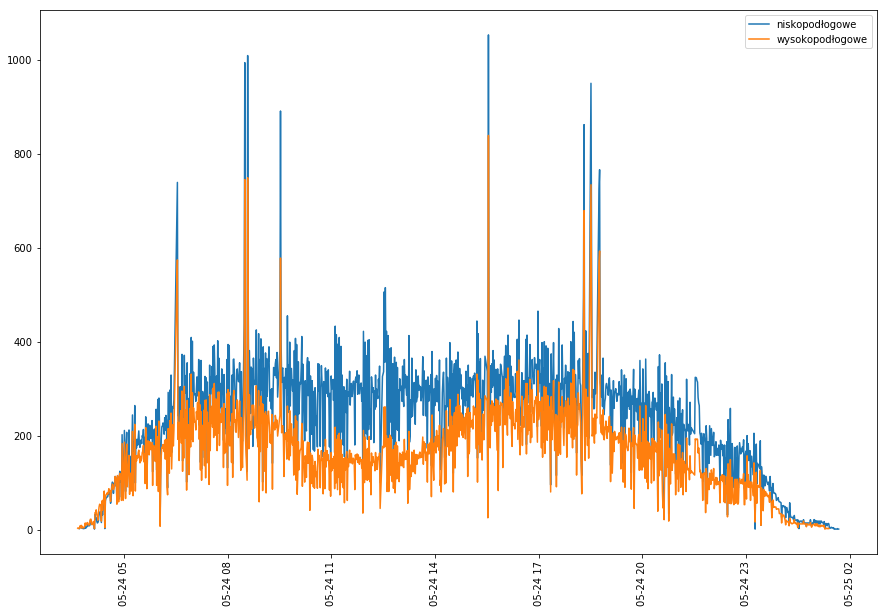

In [21]:
rcParams['figure.figsize'] = 15, 10
dataLowFloor = dataRoundedTime[dataRoundedTime['LowFloor']].groupby('Time').size()
fig, ax = plt.subplots()
ax.plot(dataLowFloor, label="niskopodłogowe")
dataHighFloor = dataRoundedTime[~dataRoundedTime['LowFloor']].groupby('Time').size()
ax.plot(dataHighFloor, label="wysokopodłogowe")
legend = ax.legend(loc='upper right')
locs, labels = plt.xticks()
plt.xticks(locs, rotation='vertical')

In [22]:
#data.groupby('FirstLine').agg(lambda x: )

In [1]:
import Mapper.mapper as mp

In [ ]:
pm = mp.PlotMap(data, color_colname='Velocity')
pm.plot(list(range(100,200)))
pm.show()